In [69]:
! pip install numpy pandas matplotlib seaborn sklearn

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,auc, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


In [72]:
#read X_train first 3 rows for header
df_X_header = pd.read_csv("X_train.csv", dtype = str, nrows = 3,header = None)

#combine df_X_header by row
X_header = []
for ic in range(len(df_X_header.columns)):
    temp = ""
    for ir in range(len(df_X_header)):
        if(ir != 0):
            temp += "&"
        temp += df_X_header.iloc[ir,ic]
    X_header.append(temp)
    


#read X_train csv files except first 3 rows 
X_train = pd.read_csv("X_train.csv",skiprows = 3,header = None)

X_valid = pd.read_csv("X_valid.csv",skiprows = 3,header = None)

X_test = pd.read_csv("X_test.csv",skiprows = 4,header = None)


#combine header and the data together
X_train.columns = X_header
X_valid.columns = X_header
X_test.columns = X_header

#read Y_train csv file
Y_train = pd.read_csv("Y_train.csv")
Y_valid = pd.read_csv("Y_valid.csv")

In [73]:
train_id = X_train.iloc[:,0]
valid_id = X_valid.iloc[:,0]
test_id  = X_test.iloc[:,0]
X_train = X_train.iloc[:,1:]
X_valid = X_valid.iloc[:,1:]
X_test  = X_test.iloc[:,1:]
X_header = X_header[1:]

y_train = Y_train.iloc[:,1]
y_valid = Y_valid.iloc[:,1]
print("X_train:",X_train.shape)
print("X_valid:",X_valid.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_valid:",Y_valid.shape)

X_train: (16760, 7488)
X_valid: (2394, 7488)
X_test: (4790, 7488)
Y_train: (16760, 2)
Y_valid: (2394, 2)


In [158]:
print("ratio of true positive in Y_valid")
print(np.round(np.sum(Y_valid.iloc[:,1])/Y_valid.shape[0],6))

ratio of true positive in Y_valid
0.063492


In [75]:
def featureSelect(df_select,df_X):
    cols = np.full(df_X.shape[1], False, dtype = bool)
    for i,feat in enumerate(df_X.columns):
        if feat in df_select.columns:
            cols[i] = True
    res = df_X.iloc[:,cols]
    res.columns = df_select.columns
    return df_X.iloc[:,cols]


In [76]:
def featureSelectByMean(df_feat,df_header,cols = None):
    if (cols == None):
        cols = np.full((df_feat.shape[1],), False, dtype = bool)
    for ic in range(len(df_header.columns)):
        if (df_header.iloc[1,ic] == "mean"):
            cols[ic] = True
    
    print("Select features with mean value:")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))        
    return df_feat.iloc[:,cols]
    

X_train_mean = featureSelectByMean(X_train,df_X_header)
X_train_mean.describe()

Select features with mean value:
Original: 7488 	Selected: 2496


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.065219,-0.064588,-0.064803,-0.064101,-0.064031,-0.063712,-0.063905,-0.064175,-0.064640,-0.064856,...,-0.000300,-0.000252,-0.000329,-0.000262,-0.000249,-0.000257,-0.000282,-0.000300,-0.000448,269.869093
std,0.423142,0.428927,0.427698,0.435464,0.436145,0.438468,0.435569,0.432840,0.426678,0.420549,...,0.339446,0.338852,0.338696,0.338709,0.338702,0.338702,0.338711,0.338711,0.338265,315.670695
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,0.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,57.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [77]:
X_valid_mean = featureSelect(X_train_mean,X_valid)
X_test_mean = featureSelect(X_train_mean, X_test)

X_train_mean[X_train_mean == 0] = np.nan
X_valid_mean[X_valid_mean == 0] = np.nan
X_test_mean[X_test_mean == 0] = np.nan



/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_17767/3767814139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_mean[X_train_mean == 0] = np.nan
/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_17767/3767814139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_mean[X_train_mean == 0] = np.nan
/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_17767/3767814139.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [78]:
# fill the nan cell with the mean of the column
for col in X_train_mean.columns:
    mean = np.mean(X_train_mean[col])
    X_train_mean[col].fillna(mean, inplace = True)
    X_valid_mean[col].fillna(mean, inplace = True)
    X_test_mean[col].fillna(mean, inplace = True)

X_train_mean.describe()

/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_17767/542643893.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_mean[col].fillna(mean, inplace = True)
/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_17767/542643893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_valid_mean[col].fillna(mean, inplace = True)
/var/folders/3s/9x8h56cj0fbfhghy32bkchfm0000gn/T/ipykernel_17767/542643893.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&mean&3,alanine aminotransferase&mean&4,alanine aminotransferase&mean&5,alanine aminotransferase&mean&6,alanine aminotransferase&mean&7,alanine aminotransferase&mean&8,alanine aminotransferase&mean&9,alanine aminotransferase&mean&10,...,white blood cell count urine&mean&15,white blood cell count urine&mean&16,white blood cell count urine&mean&17,white blood cell count urine&mean&18,white blood cell count urine&mean&19,white blood cell count urine&mean&20,white blood cell count urine&mean&21,white blood cell count urine&mean&22,white blood cell count urine&mean&23,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,282.458378
std,0.417218,0.423197,0.421912,0.429907,0.430609,0.433016,0.430047,0.427235,0.420908,0.414654,...,0.339445,0.338852,0.338695,0.338709,0.338701,0.338701,0.338710,0.338710,0.338263,310.242366
min,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,-0.279057,...,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,-0.316046,1.000000
25%,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,-0.248043,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,72.000000
50%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,180.000000
75%,-0.141552,-0.140184,-0.140650,-0.139125,-0.138974,-0.138283,-0.138701,-0.139286,-0.140297,-0.140765,...,-0.002670,-0.002250,-0.002931,-0.002337,-0.002221,-0.002286,-0.002511,-0.002670,-0.003990,360.000000
max,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,10.413320,...,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,11.783246,2232.000000


In [81]:
def featureSelectByCorr(df_feat,threshold = 0.9):
    corr = df_feat.corr()
    
    cols = np.full((corr.shape[0],), True, dtype = bool)
    for i in range(corr.shape[0],0,-1):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if(cols[j]):
                    cols[j] = False
    print("Select features by filtering features with high covariance","(>= "+str(threshold)+")",":")
    print("Original:",df_feat.shape[1],"\tSelected:",np.sum(cols))
    
    return df_feat.iloc[:,cols]

try:
    X_train_corr = pd.read_csv("X_train_corr.csv")
except:
    X_train_corr = featureSelectByCorr(X_train_mean,0.9)
    X_train_corr.to_csv("X_train_corr.csv", index = False)
X_train_corr.describe()


Select features by filtering features with high covariance (>= 0.9) :
Original: 2496 	Selected: 401


,alanine aminotransferase&mean&1,alanine aminotransferase&mean&2,alanine aminotransferase&time_since_measured&0,albumin&mean&1,albumin&time_since_measured&0,albumin ascites&mean&1,albumin ascites&time_since_measured&0,albumin pleural&mean&1,albumin pleural&time_since_measured&0,albumin urine&mean&1,...,total protein urine&time_since_measured&0,troponin-i&mean&1,troponin-t&mean&1,troponin-t&time_since_measured&0,venous pvo2&mean&1,weight&mean&1,weight&time_since_measured&0,white blood cell count&mean&1,white blood cell count urine&mean&1,white blood cell count urine&time_since_measured&0
count,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,1.676000e+04,16760.000000,16760.000000,16760.000000,1.676000e+04,...,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000,16760.000000
mean,-0.141552,-0.140184,45.100105,0.090500,56.868421,6.905796e-16,6920.953601,0.016125,8739.370574,3.108171e-18,...,1565.460133,-0.086947,-0.087665,82.114555,-0.032239,-0.022179,35.731152,0.001112,-0.001404,282.458378
std,0.417218,0.423197,33.099299,0.618241,44.778725,5.462116e-02,6258.569824,0.051815,8123.735314,5.516467e-02,...,1776.261364,0.167579,0.502631,80.141575,0.123496,0.811971,31.636408,0.962887,0.338098,310.242366
min,-0.279057,-0.279057,1.000000,-3.131888,1.000000,-1.702985e+00,2.000000,-2.312068,1.000000,-5.691630e-01,...,1.000000,-0.692272,-0.366371,1.000000,-2.765677,-3.517696,1.000000,-1.160785,-0.316046,1.000000
25%,-0.248043,-0.248043,24.000000,0.090500,24.000000,6.073573e-16,2161.500000,0.016125,2244.750000,2.348549e-17,...,405.000000,-0.086947,-0.087665,27.000000,-0.032239,-0.405690,20.000000,-0.414731,-0.001404,72.000000
50%,-0.141552,-0.140184,45.100105,0.090500,49.000000,6.073573e-16,5159.500000,0.016125,6216.000000,2.348549e-17,...,999.500000,-0.086947,-0.087665,71.000000,-0.032239,-0.022179,30.000000,-0.120972,-0.001404,180.000000
75%,-0.141552,-0.140184,48.000000,0.090500,69.000000,6.073573e-16,9888.000000,0.016125,13056.000000,2.348549e-17,...,2034.250000,-0.086947,-0.087665,96.000000,-0.032239,0.122018,35.731152,0.228741,-0.001404,360.000000
max,10.413320,10.413320,336.000000,3.492301,480.000000,3.469357e+00,31735.000000,1.613770,36853.000000,4.592960e+00,...,11424.000000,3.830272,8.913147,768.000000,3.207278,7.198578,431.000000,54.802581,11.783246,2232.000000


In [82]:
#Standardlization of features
scaler = StandardScaler()

X_train_std = pd.DataFrame(scaler.fit_transform(X_train_corr))
X_train_std.columns = X_train_corr.columns

X_valid_corr = featureSelect(X_train_std,X_valid_mean)
X_valid_std = pd.DataFrame(scaler.transform(X_valid_corr))
X_valid_std.columns = X_train_std.columns

X_test_corr = featureSelect(X_train_std,X_test_mean)
X_test_std = pd.DataFrame(scaler.transform(X_test_corr))
X_test_std.columns = X_train_std.columns

print(X_train_std.shape)
print(X_valid_std.shape)
print(X_test_std.shape)

(16760, 401)
(2394, 401)
(4790, 401)


Features selected after applying SLR model with L1 regularization:
Number of features: 401
L1 C value: 0.003 	Selected: 13
L1 C value: 0.0093 	Selected: 51
L1 C value: 0.0157 	Selected: 79
L1 C value: 0.022 	Selected: 101
L1 C value: 0.0283 	Selected: 126
L1 C value: 0.0347 	Selected: 149
L1 C value: 0.041 	Selected: 165
L1 C value: 0.0473 	Selected: 176
L1 C value: 0.0537 	Selected: 183
L1 C value: 0.06 	Selected: 202


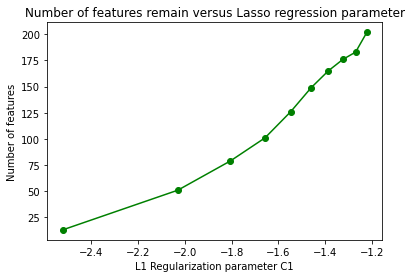

In [155]:
#Feature selection by simple logistic regression with L1 regulation
def featerSelect_L1(X_train,y_train):
    C1 = np.linspace(start = 3e-3, stop = 6e-2, num = 10)
    print("Features selected after applying SLR model with L1 regularization:")
    print("Number of features:",X_train.shape[1])
    n_feat = []
    for n_c1 in C1:
        clf = LogisticRegression(penalty = 'l1',C = n_c1, solver = 'liblinear')
        clf.fit(X_train,y_train)
    
        cols_l1 = []
        for i in range(clf.coef_.shape[1]):
            if clf.coef_[0,i] != 0.0:
                cols_l1.append(True)
            else:
                cols_l1.append(False)
        n_feat.append(np.sum(cols_l1))
        print("L1 C value:",np.round(n_c1,4), "\tSelected:",np.sum(cols_l1))

    nc_log = list(map(np.log10,C1))
    plt.xlabel("L1 Regularization parameter C1")
    plt.ylabel("Number of features")
    plt.title("Number of features remain versus Lasso regression parameter")
    plt.plot(nc_log, n_feat, marker = "o",color = "g")

featerSelect_L1(X_train_std,y_train)

In [84]:
def featureSelect_L1(X,Y,C = 0.01):
    clf = LogisticRegression(penalty = 'l1',C = C, solver = 'liblinear')
    clf.fit(X,Y)
    cols_l1 = []
    for i in range(clf.coef_.shape[1]):
        if clf.coef_[0,i] != 0.0:
            cols_l1.append(True)
        else:
            cols_l1.append(False)
    res = X.iloc[:,cols_l1]
    res.columns = X.columns[cols_l1]
    return res

X_train_select = featureSelect_L1(X_train_std,Y_train.iloc[:,1], C = 0.005)
X_valid_select = featureSelect(X_train_select, X_valid_std)
print(X_train_select.shape)

(16760, 31)


In [153]:
def visualize_AUC_L2(X_train,y_train, X_valid, y_valid,
                    l1_label = str(1e-3), CL2 = [1e-6,1e-3,1,1e3,1e6,1e9,1e12], color = 'b'):

    auc_list = []
    
    for CL2i in CL2:
        clf = LogisticRegression(penalty = 'l2', C = CL2i, solver = 'liblinear')
        clf.fit(X_train,y_train)
        auc_list.append(roc_auc_score(y_valid, clf.decision_function(X_valid)))

    nc_log = list(map(np.log10,CL2))
    plt.plot(nc_log, auc_list, marker = "o",color = color,label = l1_label)
    print("Maximized ROC_AUC :",np.round(np.max(auc_list),6),"at CL2:",np.round(CL2[auc_list.index(np.max(auc_list))],4))

using L1 regularization with C value: 0.02
Maximized ROC_AUC : 0.78776 at CL2: 100.0
using L1 regularization with C value: 0.036000000000000004
Maximized ROC_AUC : 0.794509 at CL2: 0.01
using L1 regularization with C value: 0.052000000000000005
Maximized ROC_AUC : 0.7948 at CL2: 100.0
using L1 regularization with C value: 0.068
Maximized ROC_AUC : 0.790774 at CL2: 0.01
using L1 regularization with C value: 0.084
Maximized ROC_AUC : 0.788467 at CL2: 0.01
using L1 regularization with C value: 0.1
Maximized ROC_AUC : 0.786187 at CL2: 0.01


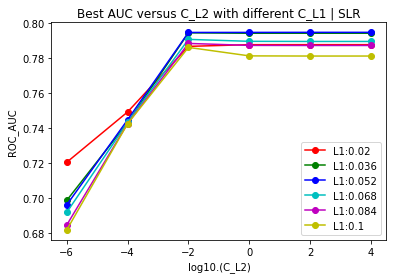

In [152]:
C_l1 = np.linspace(start = 2e-2, stop = 10e-2, num = 6)
C_l2 = [1e-6,1e-4,1e-2,1,1e2,1e4]

def ViscualizeSLR_compare(C_l1, C_l2):
    plot_color = ['r','g','b','c','m','y','k']
    plot_color = plot_color[:len(C_l1)]
    
    for ci_l1, color in zip(C_l1,plot_color):
        print("using L1 regularization with C value:",ci_l1)
        X_train_select = featureSelect_L1(X_train_std,y_train, C = ci_l1)
        X_valid_select = featureSelect(X_train_select,X_valid_std)
        
        visualize_AUC_L2(X_train_select, y_train, X_valid_select, y_valid,
                          l1_label = ("L1:" + str(np.round(ci_l1,3))),CL2 = C_l2,color = color)
    
    plt.ylabel("ROC_AUC")
    plt.xlabel("log10.(C_L2)")
    plt.legend()
    plt.title("Best AUC versus C_L2 with different C_L1 | SLR")
    
ViscualizeSLR_compare(C_l1,C_l2)

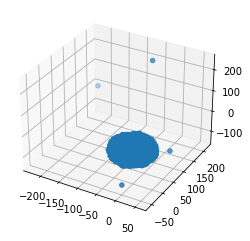

In [66]:
def visualizeResult(model,model_name, X_train,Y_train,
                    X_test, y_test_hat):
    n_feat = X_train.shape[0]
    X_train_vis = X_train.copy()
    X_test_vis =  X_test.copy()
    
    label_train_list = [ 0 for i in range(X_train_vis.shape[0])]
    label_test_list = [ 1 for i in range(X_test_vis.shape[0])]
    label_list = label_train_list + label_test_list
    # print(label_list)
    

    # print(X_train_vis.shape, X_test_vis.shape)
    # X_vis = pd.DataFrame(pd.concat([X_test_vis,X_test_vis],ignore_index = True))
    
    X_vis = X_train_vis.copy()
    X_vis = model.fit_transform(X = X_vis)
    
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')
    ax.scatter(X_vis[y_train == 0,0] , X_vis[y_train == 0,1], X_vis[y_train == 0,2], marker = 'o')
    ax.scatter(X_vis[y_train == 1,0] , X_vis[y_train == 1,1], X_vis[y_train == 1,2], marker = '^')
    
    plt.title("3D Visualization using " + model_name + " model")
    plt.show()

tSNE = TSNE(n_components = 3, learning_rate = 'auto',init = 'random')
visualizeResult(tSNE, "TSNE",X_train_select,y_train,X_valid_select, y_valid_pred)

In [71]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
visualizeResult(pca,"PCA", X_train_select,y_train,X_valid_select, y_valid_pred)

NameError: name 'visualizeResult' is not defined

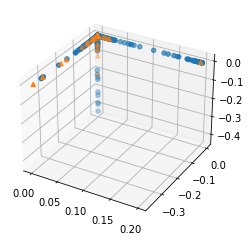

In [70]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components = 3, n_neighbors = 10)
visualizeResult(lle,"LLE", X_train_select,y_train,X_valid_select, y_valid_pred)

In [119]:
fpr = dict()
tpr = dict()
roc_auc = dict()
best_params = dict()
y_pred = dict()
y_res = dict()
y_res_prob = dict()

In [166]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(random_state = 42)
clf3 = KNeighborsClassifier()
clf4 = RandomForestClassifier(random_state = 42)
clf5 = GradientBoostingClassifier(random_state = 42)
clf6 = MLPClassifier(random_state = 42)

param1 = {'classifier__C': [1e-6,1e-4,1e-2,1,1e2],
          'classifier__penalty': ['l2'],
          'classifier' : [clf1]
         }

param2 = {'classifier__max_depth': [5,10,None],
          'classifier__min_samples_split': [2,5,10],
          'classifier__class_weight': [None,{0:1,1:5},{0:1,1:10}],
          'classifier' : [clf2]
         }

param3 = {'classifier__n_neighbors': [25,50],
         'classifier' : [clf3]
         }

param4 = {'classifier__n_estimators': [200,250,350],
         'classifier__max_depth': [10,25],
         'classifier__class_weight': [None,{0:1,1:5}],
         'classifier' : [clf4]
         }

param5 = {'classifier__n_estimators': [50],
         'classifier__max_depth': [5],
         'classifier' : [clf5]
         }

param6 = {'classifier__hidden_layer_sizes': [(50,100,150)],
         'classifier__activation': ['relu'],
         'classifier__solver': ['sgd'],
         'classifier__alpha': [1],
         'classifier__learning_rate' :['constant'],
         'classifier__max_iter': [1000],
         'classifier' : [clf6]}

clf_names = ["Logistic", "DecisionTree", "KNN", "RandomForest", "GraidentBoosting","MLP"]
clfs = [clf1,clf2,clf3,clf4,clf5,clf6]
params = [param1, param2, param3, param4, param5, param6]

def modelSelection(X_train,y_train,X_valid,y_valid,X_test):
    for clf, name, param in zip(clfs, clf_names, params):
        if(name == "RandomForest"):
            pipeline = Pipeline([('classifier', clf)])
            gs = GridSearchCV(pipeline, param, cv = 5, n_jobs = -1, 
                              scoring = 'roc_auc', verbose = 1).fit(X_train, y_train)

            y_valid_score = None
            if(name in ["Logistic","GraidentBoosting"]):
                y_valid_score = gs.decision_function(X_valid)
            elif(name in ["DecisionTree","KNN","RandomForest","XGBoost","MLP"]):
                y_valid_score = gs.predict_proba(X_valid)[:,1]
            y_pred[name] = gs.predict(X_valid)
            y_res[name] = gs.predict(X_test)
            y_res_prob[name] = gs.predict_proba(X_test)[:,1]
            fpr[name],tpr[name], _ = roc_curve(y_valid, y_valid_score)
            roc_auc[name] = auc(fpr[name],tpr[name])
            best_params[name] = gs.best_params_

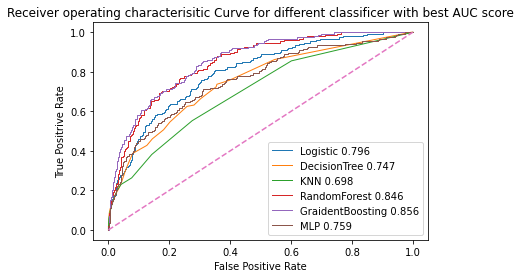

In [93]:
def visualResult_roc(fpr, tpr, roc_auc, clf_names):
    plt.figure()
    for name in roc_auc.keys():
        plt.plot(fpr[name],tpr[name], lw = 1, label = name + " %0.3f" %roc_auc[name])

    plt.plot([0,1], [0,1], "--")
    plt.xlim  = [0.0, 1.0]
    plt.ylim = [0.0, 1.05]
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positrive Rate")
    plt.title("Receiver operating characterisitic Curve for different classificer with best AUC score")
    plt.legend(loc = "lower right")
    plt.show()
    
visualResult_roc(fpr,tpr, roc_auc,clf_names)

In [ ]:
X_train_select = featureSelect_L1(X_train_std,y_train, C = 5e-2)
X_valid_select = featureSelect(X_train_select,X_valid_std)
X_test_select = featureSelect(X_train_select,X_test_std)

modelSelection(X_train_select,y_train,X_valid_select,y_valid,X_test_select)
visualResult_roc(fpr,tpr, roc_auc,clf_names)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(16760, 177)
(2394, 177)
(19154, 177)
(19154,)
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


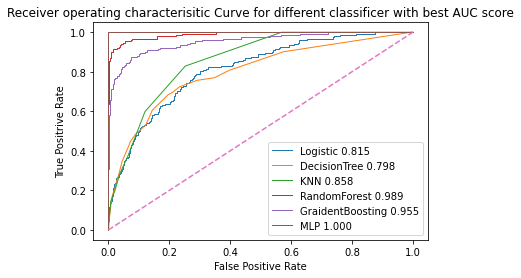

In [129]:
X_comb = pd.concat([X_train_select,X_valid_select])
y_comb = pd.concat([y_train,y_valid])

print(X_train_select.shape)
print(X_valid_select.shape)
print(X_comb.shape)
print(y_comb.shape)

modelSelection(X_comb,y_comb,X_valid_select,y_valid,X_test_select)
visualResult_roc(fpr,tpr, roc_auc,clf_names)

In [157]:
best_params["RandomForest"]

{'classifier': RandomForestClassifier(class_weight={0: 1, 1: 5}, max_depth=10,
                        n_estimators=250, random_state=42),
 'classifier__class_weight': {0: 1, 1: 5},
 'classifier__max_depth': 10,
 'classifier__n_estimators': 250}

In [159]:
roc_auc["RandomForest"]

0.9891749612657872

In [161]:

res_dict = {'Id' : test_id, 'predicted' : y_res_prob["GraidentBoosting"]}
df_res = pd.DataFrame(res_dict)
df_res.head()
df_res.to_csv("taskOnePrediction_MLP_by_train_valid.csv",index = False)